In [232]:
import numpy as np
import cv2
import os
import shutil
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import *
from keras.layers import *
from keras.regularizers import *
from keras.optimizers import *

from IPython.display import Image
from keras import applications

In [233]:
batch_size = 64
img_width, img_height = 400, 400

In [234]:
%mkdir -p data/train/cats
%mkdir -p data/validate/cats
%mkdir -p data/train/dogs
%mkdir -p data/validate/dogs


In [235]:
train_imgs = os.listdir('input/train')[:2000]
valid_imgs = os.listdir('input/train')[2000:2800]

for i in train_imgs:
    if i[:3] == 'cat':
        shutil.copy2('input/train/' + i, 'data/train/cats/')
    elif i[:3] == 'dog':
        shutil.copy2('input/train/' + i, 'data/train/dogs/')

for i in valid_imgs:
    if i[:3] == 'cat':
        shutil.copy2('input/train/' + i, 'data/validate/cats/')
    elif i[:3] == 'dog':
        shutil.copy2('input/train/' + i, 'data/validate/dogs/')        

# Data augmentation

Augmenting data with a data generator with random affine transformations

In [236]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.1,)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(img_height,img_width),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


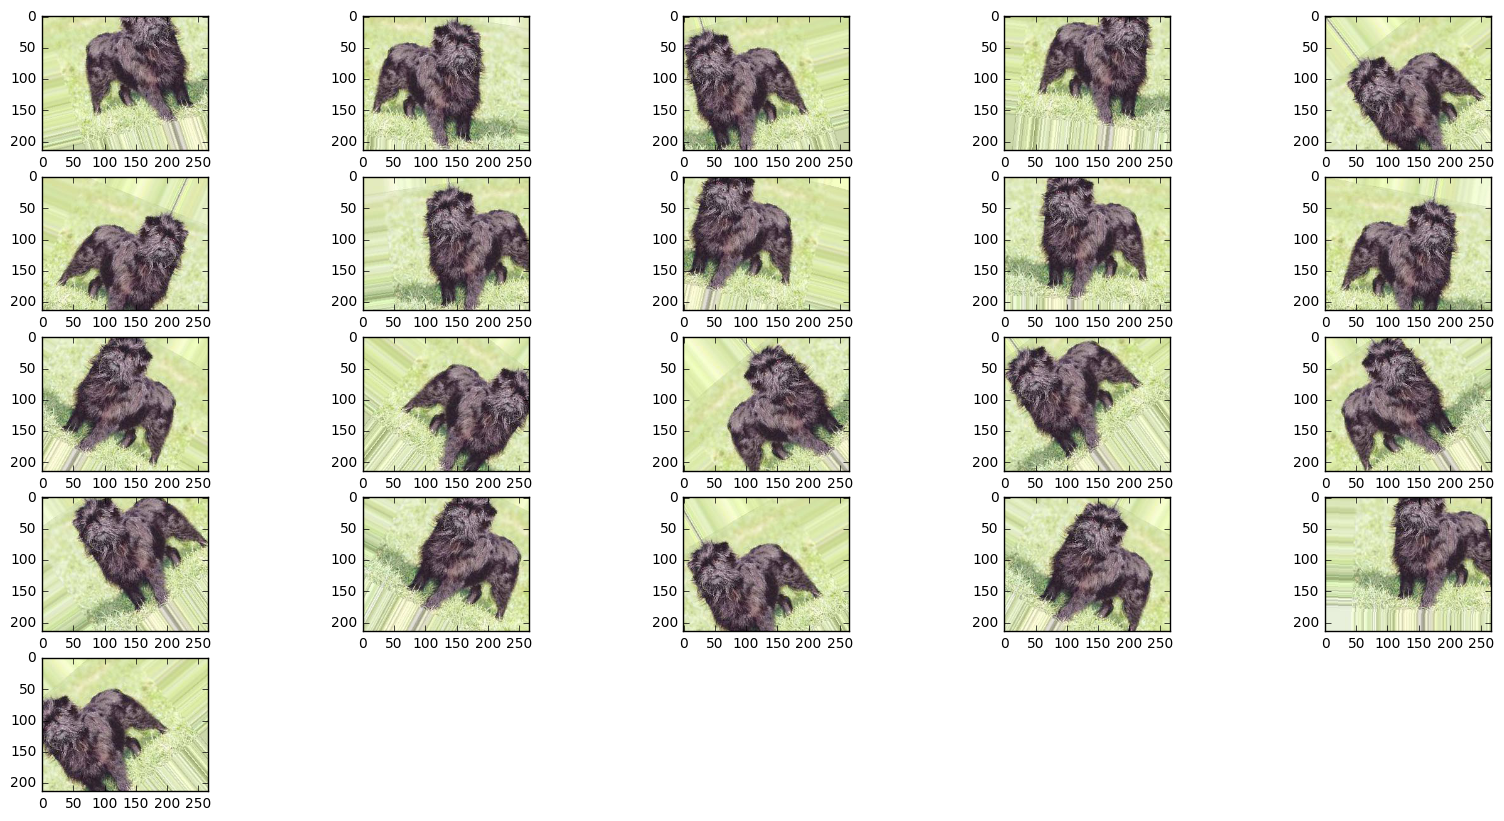

In [237]:
images = os.listdir('preview')
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    image = load_img('preview/' + images[i])
    plt.imshow(image)    

In [238]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        'data/validate',
        target_size=(img_height,img_width),
        batch_size=batch_size,
        class_mode='binary')

Found 800 images belonging to 2 classes.


In [239]:
classes = len(train_generator.class_indices)
assert classes is len(val_generator.class_indices)
nb_train_samples = train_generator.samples
nb_val_samples = val_generator.samples

In [242]:
model = Sequential([
    BatchNormalization(axis=1, input_shape=(img_width,img_height,3)),
    Convolution2D(32, (3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D(),
    Convolution2D(64, (3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D(),
    Convolution2D(128, (3,3), activation='relu'),
    BatchNormalization(axis=1),
    MaxPooling2D(),
    Flatten(),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [243]:
model.compile(Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_37 (Batc (None, 400, 400, 3)       1600      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 398, 398, 32)      896       
_________________________________________________________________
batch_normalization_38 (Batc (None, 398, 398, 32)      1592      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 197, 197, 64)      18496     
_________________________________________________________________
batch_normalization_39 (Batc (None, 197, 197, 64)      788       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 98, 98, 64)        0         
__________

In [124]:
model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_val_samples//batch_size)

Epoch 1/15
31/31 [==============================] - 33s 1s/step - loss: 1.0124 - acc: 0.5419 - val_loss: 0.7025 - val_acc: 0.5143
Epoch 2/15
31/31 [==============================] - 32s 1s/step - loss: 0.9443 - acc: 0.5640 - val_loss: 0.7851 - val_acc: 0.5143
Epoch 3/15
31/31 [==============================] - 31s 996ms/step - loss: 0.9149 - acc: 0.5656 - val_loss: 0.8784 - val_acc: 0.5143
Epoch 4/15
31/31 [==============================] - 30s 978ms/step - loss: 0.8915 - acc: 0.5625 - val_loss: 0.9417 - val_acc: 0.5143
Epoch 5/15
31/31 [==============================] - 29s 950ms/step - loss: 0.8879 - acc: 0.5766 - val_loss: 0.8576 - val_acc: 0.5156
Epoch 6/15
31/31 [==============================] - 30s 969ms/step - loss: 0.8752 - acc: 0.5716 - val_loss: 0.7609 - val_acc: 0.5169
Epoch 7/15
31/31 [==============================] - 28s 918ms/step - loss: 0.8686 - acc: 0.5705 - val_loss: 0.6912 - val_acc: 0.5456
Epoch 8/15
31/31 [==============================] - 30s 968ms/step - loss: 

In [125]:
model.optimizer.lr=0.001
model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=nb_val_samples//batch_size)

Epoch 1/20
31/31 [==============================] - 34s 1s/step - loss: 0.7870 - acc: 0.6119 - val_loss: 0.5997 - val_acc: 0.6875
Epoch 2/20
31/31 [==============================] - 32s 1s/step - loss: 0.7579 - acc: 0.6155 - val_loss: 0.5813 - val_acc: 0.6979
Epoch 3/20
31/31 [==============================] - 31s 1s/step - loss: 0.7579 - acc: 0.6209 - val_loss: 0.5791 - val_acc: 0.6849
Epoch 4/20
31/31 [==============================] - 31s 990ms/step - loss: 0.7827 - acc: 0.6104 - val_loss: 0.5862 - val_acc: 0.6927
Epoch 5/20
31/31 [==============================] - 30s 959ms/step - loss: 0.7822 - acc: 0.6121 - val_loss: 0.6275 - val_acc: 0.6810
Epoch 6/20
31/31 [==============================] - 29s 934ms/step - loss: 0.7519 - acc: 0.6211 - val_loss: 0.5705 - val_acc: 0.7201
Epoch 7/20
31/31 [==============================] - 29s 936ms/step - loss: 0.7146 - acc: 0.6447 - val_loss: 0.5829 - val_acc: 0.6732
Epoch 8/20
31/31 [==============================] - 29s 944ms/step - loss: 0.7

In [127]:
model.optimizer.lr=0.00005
model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=nb_val_samples//batch_size)

Epoch 1/20
31/31 [==============================] - 33s 1s/step - loss: 0.6049 - acc: 0.6951 - val_loss: 0.5384 - val_acc: 0.7370
Epoch 2/20
31/31 [==============================] - 32s 1s/step - loss: 0.6183 - acc: 0.6960 - val_loss: 0.5308 - val_acc: 0.7292
Epoch 3/20
31/31 [==============================] - 32s 1s/step - loss: 0.5973 - acc: 0.6921 - val_loss: 0.5306 - val_acc: 0.7201
Epoch 4/20
31/31 [==============================] - 31s 1s/step - loss: 0.5968 - acc: 0.7047 - val_loss: 0.4970 - val_acc: 0.7591
Epoch 5/20
31/31 [==============================] - 30s 974ms/step - loss: 0.6005 - acc: 0.7013 - val_loss: 0.5071 - val_acc: 0.7383
Epoch 6/20
31/31 [==============================] - 29s 935ms/step - loss: 0.5839 - acc: 0.7156 - val_loss: 0.5378 - val_acc: 0.7409
Epoch 7/20
31/31 [==============================] - 30s 955ms/step - loss: 0.5656 - acc: 0.7164 - val_loss: 0.5193 - val_acc: 0.7331
Epoch 8/20
31/31 [==============================] - 30s 957ms/step - loss: 0.5989

In [128]:
model.optimizer.lr=0.00001
model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=nb_val_samples//batch_size)

Epoch 1/20
31/31 [==============================] - 33s 1s/step - loss: 0.5462 - acc: 0.7294 - val_loss: 0.4967 - val_acc: 0.7487
Epoch 2/20
31/31 [==============================] - 33s 1s/step - loss: 0.5362 - acc: 0.7400 - val_loss: 0.5864 - val_acc: 0.6732
Epoch 3/20
31/31 [==============================] - 32s 1s/step - loss: 0.5472 - acc: 0.7328 - val_loss: 0.4950 - val_acc: 0.7591
Epoch 4/20
31/31 [==============================] - 31s 1s/step - loss: 0.5354 - acc: 0.7459 - val_loss: 0.4548 - val_acc: 0.7852
Epoch 5/20
31/31 [==============================] - 30s 963ms/step - loss: 0.5669 - acc: 0.7262 - val_loss: 0.5245 - val_acc: 0.7240
Epoch 6/20
31/31 [==============================] - 30s 959ms/step - loss: 0.5472 - acc: 0.7275 - val_loss: 0.4966 - val_acc: 0.7669
Epoch 7/20
31/31 [==============================] - 30s 979ms/step - loss: 0.5178 - acc: 0.7480 - val_loss: 0.4738 - val_acc: 0.7643
Epoch 8/20
31/31 [==============================] - 29s 935ms/step - loss: 0.5533

In [179]:
model.optimizer.lr=0.000004
model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_val_samples//batch_size)

Epoch 1/5
31/31 [==============================] - 32s 1s/step - loss: 0.4870 - acc: 0.7642 - val_loss: 0.4949 - val_acc: 0.7695
Epoch 2/5
31/31 [==============================] - 32s 1s/step - loss: 0.4861 - acc: 0.7587 - val_loss: 0.4719 - val_acc: 0.7839
Epoch 3/5
31/31 [==============================] - 32s 1s/step - loss: 0.5152 - acc: 0.7506 - val_loss: 0.4947 - val_acc: 0.7669
Epoch 4/5
31/31 [==============================] - 31s 998ms/step - loss: 0.4929 - acc: 0.7698 - val_loss: 0.4687 - val_acc: 0.7852
Epoch 5/5
31/31 [==============================] - 30s 976ms/step - loss: 0.4917 - acc: 0.7727 - val_loss: 0.4639 - val_acc: 0.7917


# Pseudo Labelling

#### Our model at this point is kinda good, we'll use this model to generate pseudo labels and and them to the training set and train again

In [227]:
pseudolabelling_data = os.listdir('input/test/unknown')[:2000]

In [228]:
pseudolabelling_data[0]

'cat.1598.jpg'

In [229]:
def predict_cat(img):
    image = load_img(img, target_size=(img_width, img_height))
    x = img_to_array(image)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_proba(images, batch_size=10)
    return classes[0][0]


In [230]:
predict_cat('data/validate/cats/cat.1598.jpg')

0.0

In [231]:
sum1 = 0
for i in pseudolabelling_data:   
    sum1+=predict_cat('data/validate/cats/' + i)  
print sum1
        

3.06808681542


In [79]:

for i in pseudolabelling_data:
    if (predict_cat('input/test/unknown/' + i) == 1):
        os.rename('input/test/unknown/' + i, 'data/train/cats/' + i)
    else:
        os.rename('input/test/unknown/' + i, 'data/train/dogs/' + i)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(img_height,img_width),
        batch_size=batch_size,
        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [80]:
model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_val_samples//batch_size)

Epoch 1/10
31/31 [==============================] - 33s 1s/step - loss: 0.8625 - acc: 0.5867 - val_loss: 0.6543 - val_acc: 0.6432
Epoch 2/10
31/31 [==============================] - 30s 953ms/step - loss: 0.7710 - acc: 0.6124 - val_loss: 0.6037 - val_acc: 0.6523
Epoch 3/10
31/31 [==============================] - 33s 1s/step - loss: 0.7454 - acc: 0.5821 - val_loss: 0.6351 - val_acc: 0.6523
Epoch 4/10
31/31 [==============================] - 29s 946ms/step - loss: 0.7781 - acc: 0.5948 - val_loss: 0.6880 - val_acc: 0.5833
Epoch 5/10
31/31 [==============================] - 31s 1s/step - loss: 0.7158 - acc: 0.6295 - val_loss: 0.6354 - val_acc: 0.6328
Epoch 6/10
31/31 [==============================] - 29s 943ms/step - loss: 0.7203 - acc: 0.6038 - val_loss: 0.6294 - val_acc: 0.6484
Epoch 7/10
31/31 [==============================] - 31s 1s/step - loss: 0.7191 - acc: 0.6164 - val_loss: 0.6488 - val_acc: 0.6354
Epoch 8/10
31/31 [==============================] - 29s 938ms/step - loss: 0.7196

In [81]:
model.optimizer.lr = 0.001
model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_val_samples//batch_size)

Epoch 1/10
31/31 [==============================] - 33s 1s/step - loss: 0.7163 - acc: 0.6024 - val_loss: 0.6245 - val_acc: 0.6315
Epoch 2/10
31/31 [==============================] - 29s 948ms/step - loss: 0.7123 - acc: 0.6179 - val_loss: 0.6230 - val_acc: 0.6393
Epoch 3/10
31/31 [==============================] - 33s 1s/step - loss: 0.7261 - acc: 0.6159 - val_loss: 0.6205 - val_acc: 0.6419
Epoch 4/10
31/31 [==============================] - 29s 941ms/step - loss: 0.6937 - acc: 0.6175 - val_loss: 0.6185 - val_acc: 0.6484
Epoch 5/10
31/31 [==============================] - 33s 1s/step - loss: 0.6989 - acc: 0.6094 - val_loss: 0.6217 - val_acc: 0.6393
Epoch 6/10
31/31 [==============================] - 29s 949ms/step - loss: 0.7140 - acc: 0.6048 - val_loss: 0.6130 - val_acc: 0.6393
Epoch 7/10
31/31 [==============================] - 31s 991ms/step - loss: 0.6930 - acc: 0.6315 - val_loss: 0.6094 - val_acc: 0.6523
Epoch 8/10
31/31 [==============================] - 29s 949ms/step - loss: 0.6